In [1]:
from cds_data_fetch import *
import pandas as pd
from pandas.tseries.offsets import MonthEnd, YearEnd

import numpy as np
import wrds

import config
from pathlib import Path
import cds_processing
import plot_interest_rates
from plot_interest_rates import plot_interest_rates
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
import seaborn as sns
import cds_processing
from cds_processing import calc_cds_monthly
import plot_cds
from plot_cds import cds_spread_plot
import calc_cds_returns
from calc_cds_returns import calc_cds_return 
from calc_cds_returns import calc_difference


### Interest rates

/Users/dianacastellanospolina/Documents/Maestría/2Q - Winter/Data Science tools for finance/P15_DANK/src/interest_rates.py:65: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  processed_df.index = pd.to_datetime(processed_df.index)


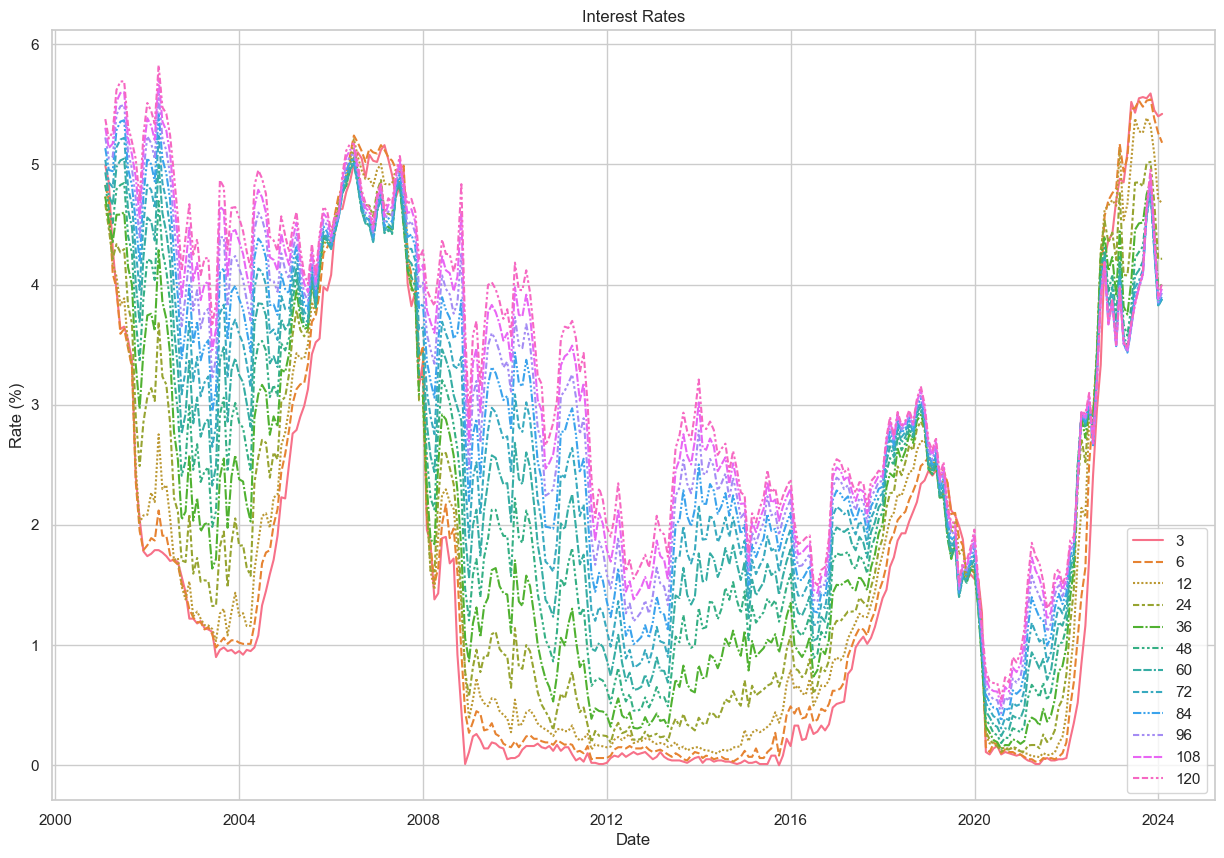

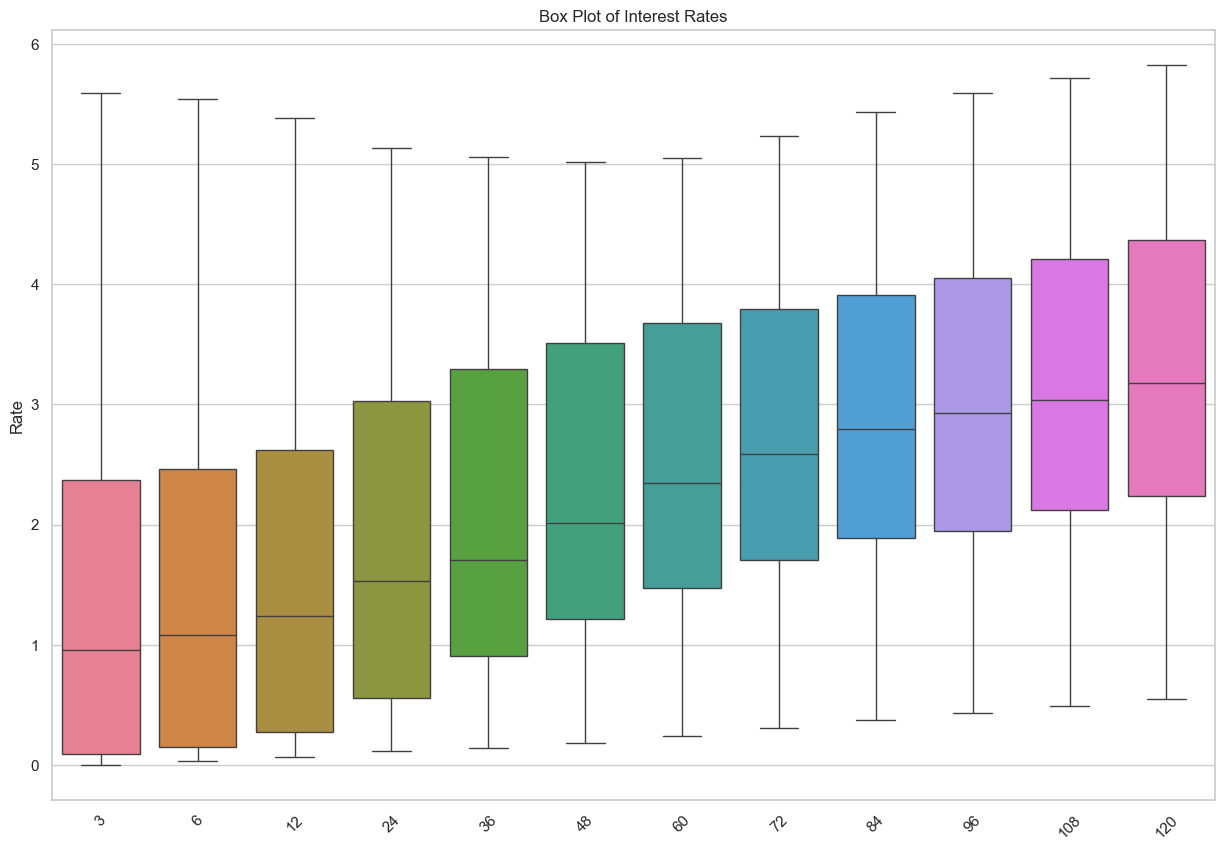

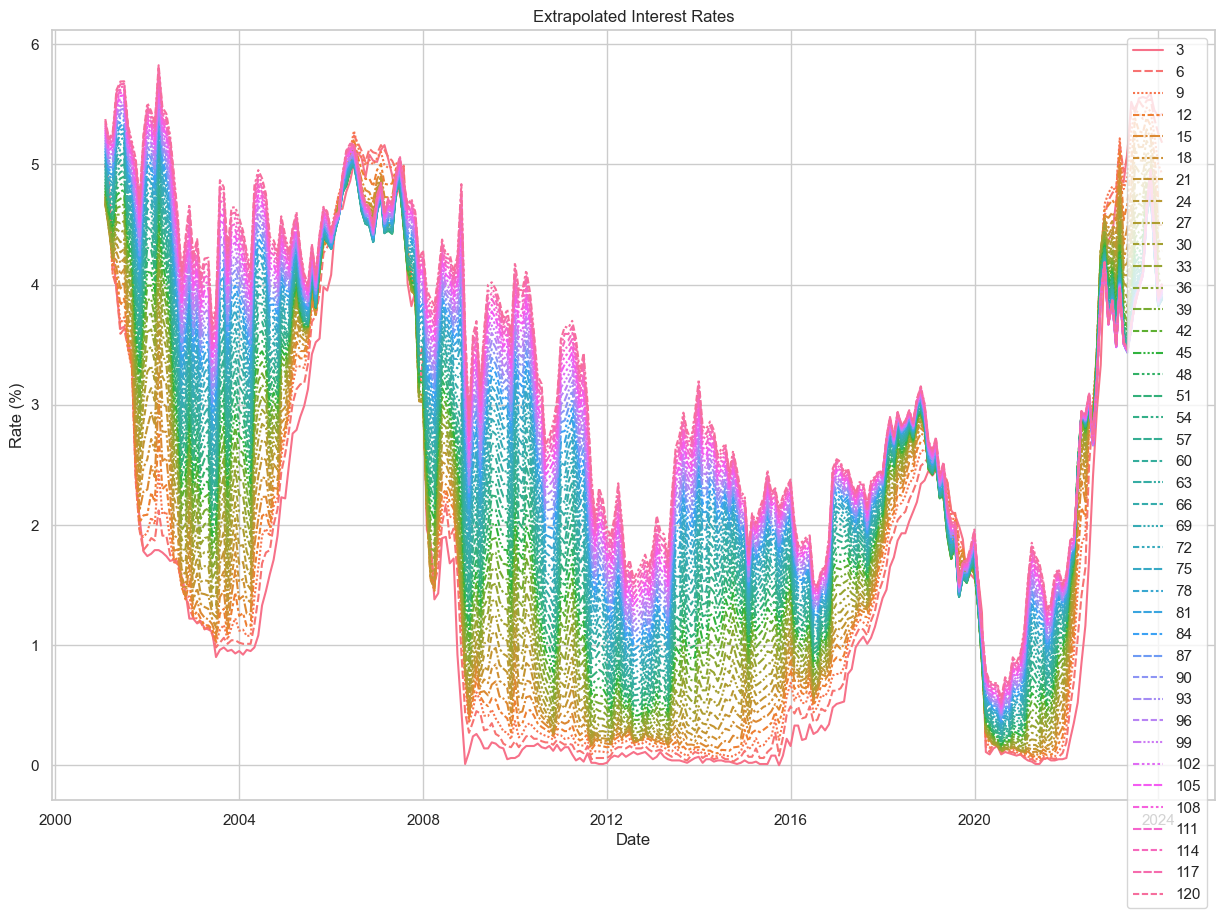

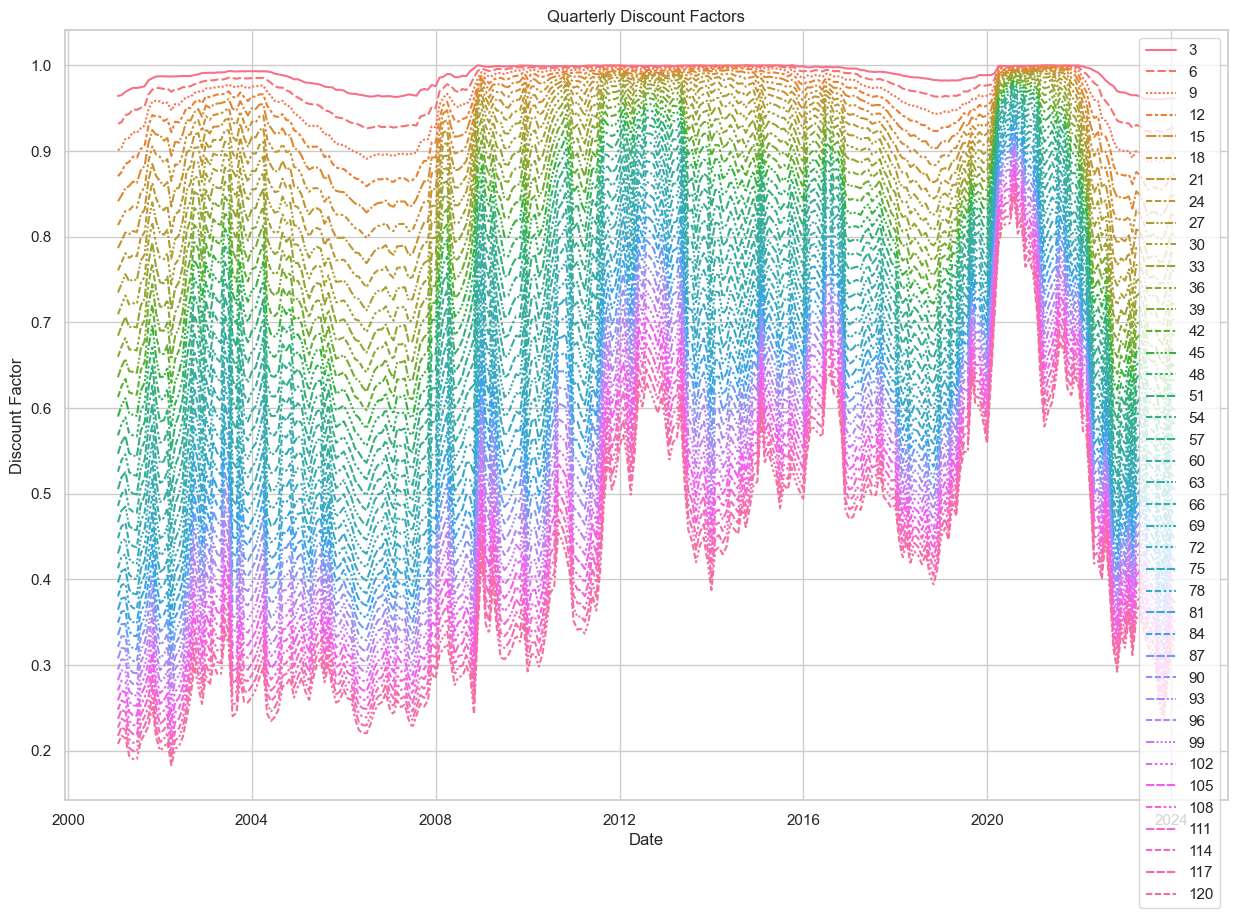

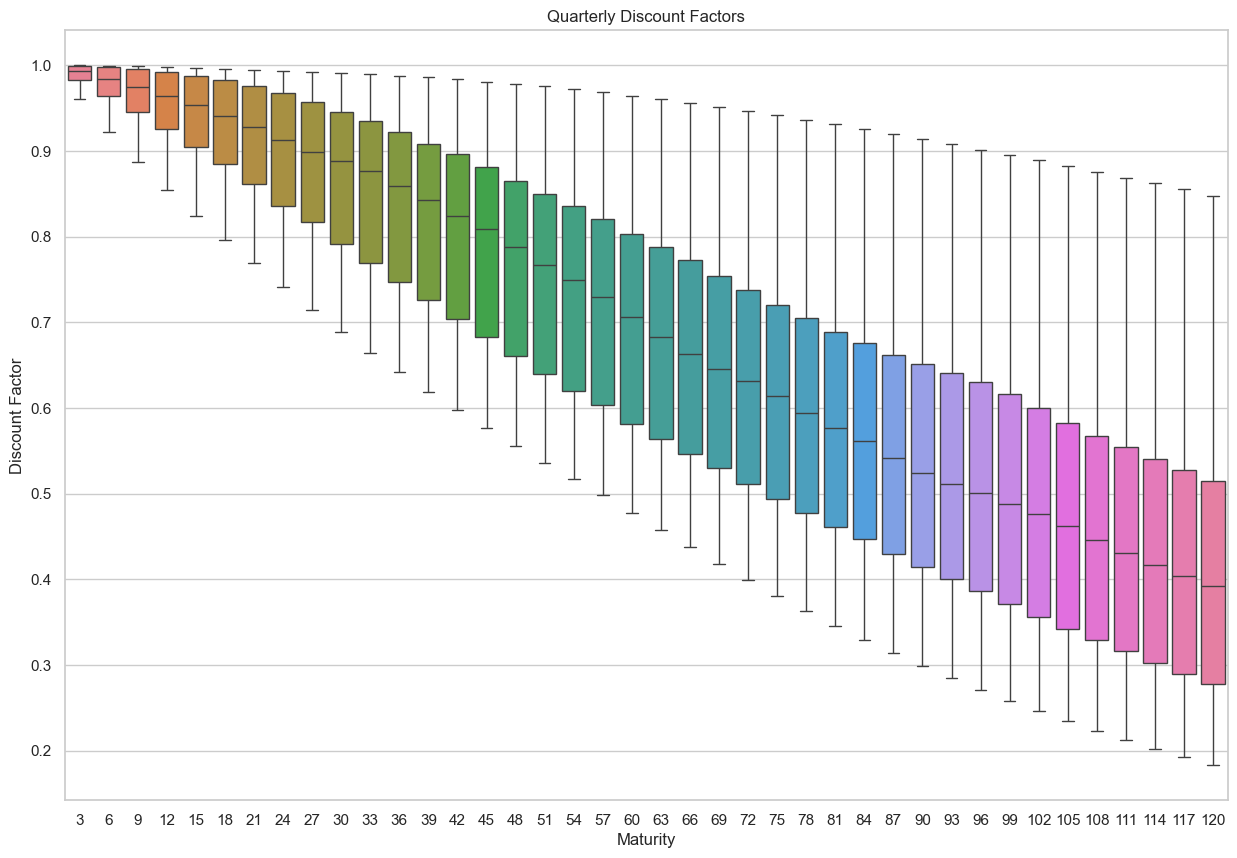

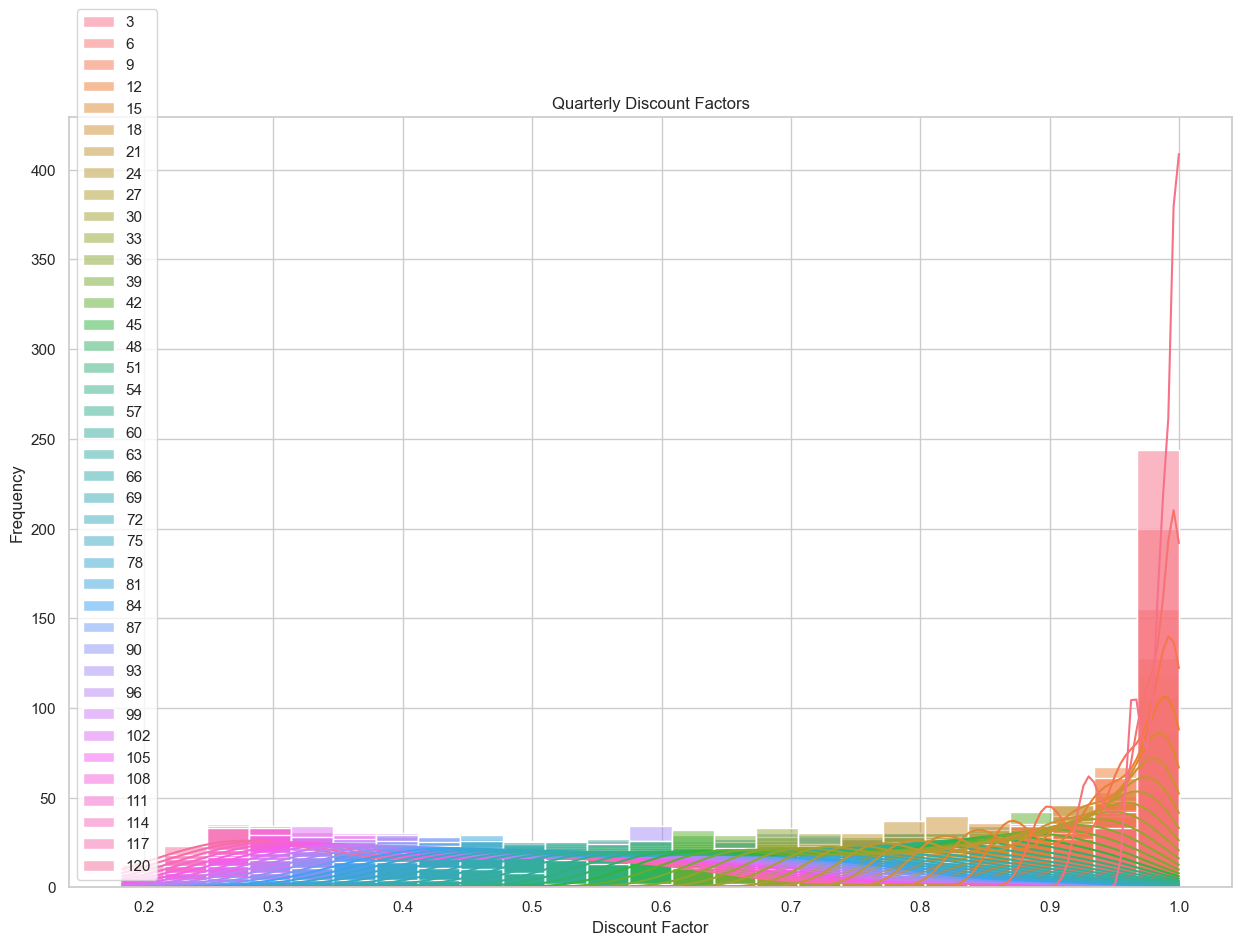

              3           6           9           12          15          18   \
count  277.000000  277.000000  277.000000  277.000000  277.000000  277.000000   
mean     0.988775    0.976307    0.963539    0.950879    0.937958    0.924610   
std      0.012430    0.024533    0.035559    0.045288    0.054365    0.063058   
min      0.960026    0.922305    0.887033    0.854371    0.824187    0.796219   
25%      0.982586    0.964203    0.945442    0.925327    0.904942    0.884126   
50%      0.992860    0.984016    0.974557    0.963735    0.953106    0.940460   
75%      0.999326    0.997754    0.995235    0.991792    0.987412    0.982499   
max      1.000000    0.999550    0.998879    0.997969    0.996906    0.995630   

              21          24          27          30   ...         93   \
count  277.000000  277.000000  277.000000  277.000000  ...  277.000000   
mean     0.910810    0.896552    0.881844    0.866700  ...    0.526933   
std      0.071359    0.079129    0.086164    0.0

In [8]:
start_date = '2001-01-02'
end_date = '2024-01-31'
plot_interest_rates(start_date=start_date, end_date=end_date)

### Credit default swaps (CDS) spread

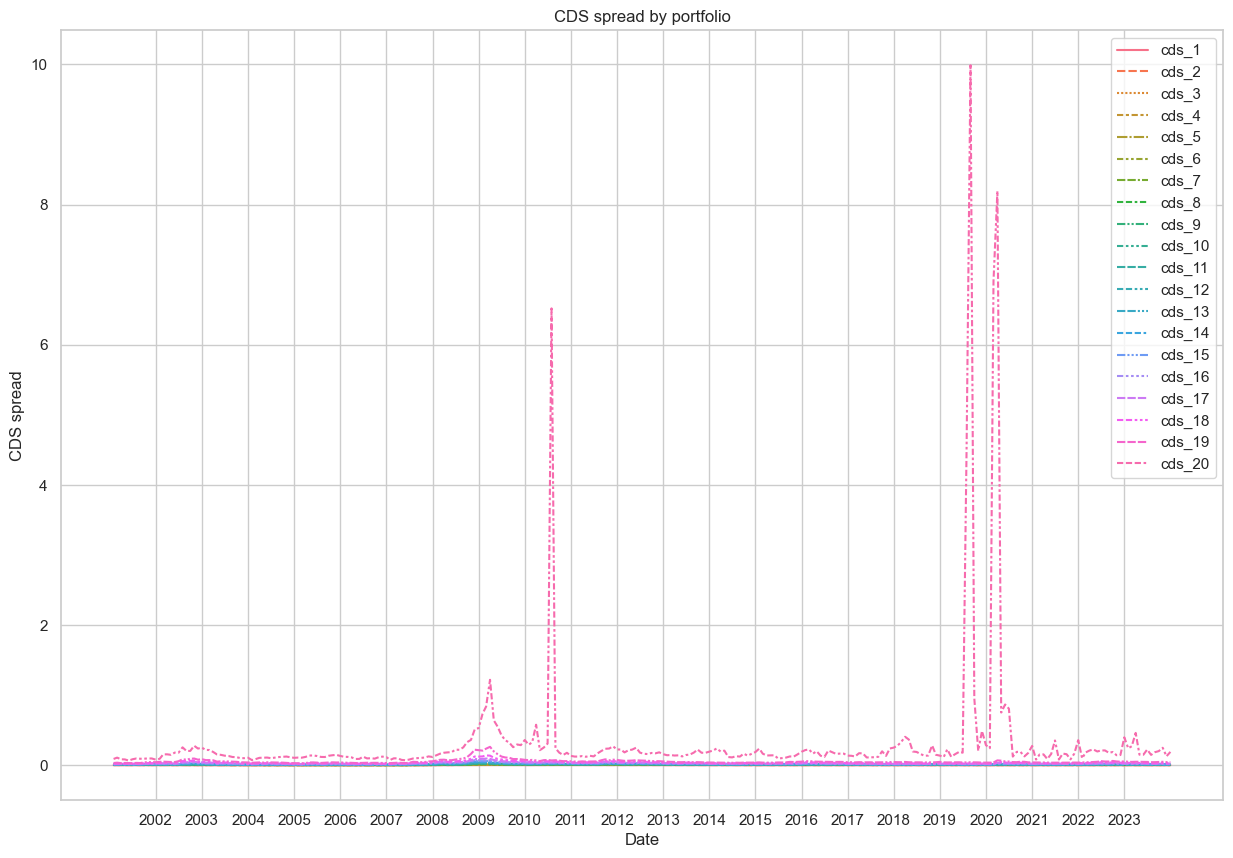

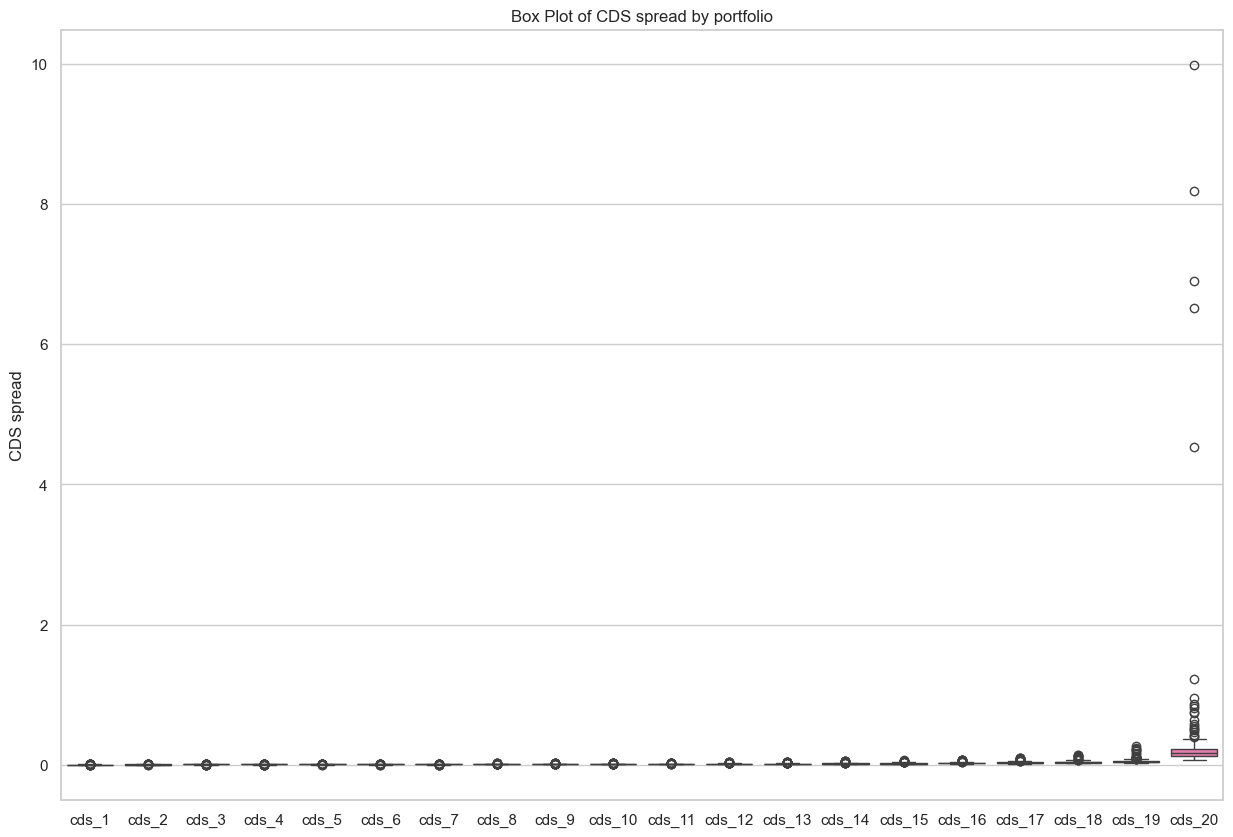

            cds_1       cds_2       cds_3       cds_4       cds_5       cds_6  \
count  276.000000  276.000000  276.000000  276.000000  276.000000  276.000000   
mean     0.002078    0.003091    0.003773    0.004430    0.005128    0.005838   
std      0.000717    0.001046    0.001274    0.001506    0.001765    0.002039   
min      0.000681    0.001070    0.001351    0.001609    0.001915    0.002252   
25%      0.001721    0.002541    0.003185    0.003758    0.004312    0.004924   
50%      0.002018    0.002992    0.003668    0.004273    0.004997    0.005695   
75%      0.002362    0.003488    0.004278    0.005010    0.005857    0.006642   
max      0.004356    0.007021    0.008761    0.010002    0.011715    0.013391   

            cds_7       cds_8       cds_9      cds_10      cds_11      cds_12  \
count  276.000000  276.000000  276.000000  276.000000  276.000000  276.000000   
mean     0.006593    0.007406    0.008276    0.009251    0.010391    0.011819   
std      0.002333    0.0027

In [31]:
cds_spread_plot(start_date=start_date, end_date=end_date)

# CDS returns estimation

In [5]:
start_date = '2001-01-02'
end_date = '2012-12-31'
returns_mean_2012 =calc_cds_return(start_date=start_date, end_date=end_date,Method ='mean')
returns_median_2012 =calc_cds_return(start_date=start_date, end_date=end_date,Method ='median')
returns_weighted_2012 =calc_cds_return(start_date=start_date, end_date=end_date,Method ='weighted')

In [7]:
start_date2 = '2013-01-02'
end_date2 = '2024-01-31'
returns_mean_2024 =calc_cds_return(start_date=start_date2, end_date=end_date2,Method ='mean')
returns_median_2024 =calc_cds_return(start_date=start_date2, end_date=end_date2,Method ='median')
returns_weighted_2024 =calc_cds_return(start_date=start_date2, end_date=end_date2,Method ='weighted')

In [8]:
returns_mean_2024

,cds_1,cds_2,cds_3,cds_4,cds_5,cds_6,cds_7,cds_8,cds_9,cds_10,cds_11,cds_12,cds_13,cds_14,cds_15,cds_16,cds_17,cds_18,cds_19,cds_20
Date,,,,,,,,,,,,,,,,,,,,
2001-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-02-28,0.000208,0.000279,0.000333,0.000363,0.000434,0.000466,0.000507,0.000555,0.000607,0.000678,0.000749,0.000840,0.000929,0.001044,0.001179,0.001346,0.001563,0.002073,0.002742,0.007792
2001-03-31,0.000201,0.000263,0.000331,0.000365,0.000430,0.000477,0.000512,0.000570,0.000643,0.000719,0.000803,0.000883,0.000976,0.001199,0.001311,0.001431,0.001581,0.002086,0.003100,0.007792
2001-04-30,0.000200,0.000265,0.000316,0.000347,0.000397,0.000453,0.000512,0.000582,0.000646,0.000693,0.000756,0.000827,0.000916,0.001025,0.001222,0.001405,0.001551,0.001889,0.002565,0.007792
2001-05-31,0.000200,0.000265,0.000312,0.000345,0.000385,0.000429,0.000490,0.000590,0.000642,0.000687,0.000749,0.000806,0.000885,0.001098,0.001235,0.001444,0.001768,0.002163,0.002827,0.007792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-31,-0.000064,-0.000068,0.000367,0.000173,0.000161,0.000180,0.000278,0.000171,0.000620,0.000466,0.000341,0.000834,0.001487,0.002173,0.001419,0.001120,0.001348,0.003126,0.005134,0.000031
2023-09-30,0.000401,0.001135,0.001057,0.001508,0.001817,0.002190,0.001790,0.002502,0.002667,0.003169,0.003687,0.003485,0.002588,0.005441,0.006124,0.007229,0.008544,0.012694,0.015324,0.015805
2023-10-31,0.000127,0.000822,0.001030,0.001004,0.001405,0.001422,0.001359,0.001317,0.001927,0.002327,0.002598,0.002668,0.002512,0.002575,0.003844,0.003369,0.004503,0.007964,0.011395,0.015805


In [10]:
def performance_summary(asset_return, period):
    
    return_index = 1000*(1+asset_return).cumprod() #assume 1000 dollars base, return cumulative return
    previous_peaks = return_index.cummax() #find running maximum of return_index 
    drawdowns = (return_index - previous_peaks)/previous_peaks #drawdown = percentage loss from previous peaks
    
    recovery_date = [] 
    for col in return_index.columns: #for each asset
        #Finds the peak of the return_index for each asset before the maximum drawdown occurred
        prev_max = previous_peaks[col][:drawdowns[col].idxmin()].max() 
        #Create a DataFrame (transposed) of return after maximum drawdown date
        recovery_return = pd.DataFrame([return_index[col][drawdowns[col].idxmin():]]).T
        #add first date that which the return_index recovers to or exceeds prev_max, and append the each to the recovery_date list
        recovery_date.append(recovery_return[recovery_return[col] >= prev_max].index.min())
    
    df = pd.DataFrame({
    'Mean': asset_return.mean() * 12,
    'Volatility': asset_return.std() * np.sqrt(12),
    'Sharpe Ratio': (asset_return.mean() * 12) / (asset_return.std() * np.sqrt(12)),
    'Skewness': asset_return.skew(),
    'Excess Kurtosis': asset_return.kurtosis(),
    'VaR (.05)' : asset_return.quantile(0.05, axis = 0),
    'CVaR (.05)' : asset_return[asset_return <= asset_return.quantile(0.05, axis = 0)].mean(),
    'Max Drawdown' : drawdowns.min(),
    'Peak' : [previous_peaks[col][:drawdowns[col].idxmin()].idxmax() for col in previous_peaks.columns],
    'Bottom' : drawdowns.idxmin(),
    'Recovery' : recovery_date})

    return df

In [11]:
performance_summary(returns_mean_2012, 4)

,Mean,Volatility,Sharpe Ratio,Skewness,Excess Kurtosis,VaR (.05),CVaR (.05),Max Drawdown,Peak,Bottom,Recovery
cds_1,0.002110,0.002256,0.935275,0.333806,13.107579,-0.000635,-0.001351,-0.007029,2009-03-31,2009-07-31,2010-05-31
cds_2,0.003216,0.003737,0.860668,0.134795,11.270446,-0.000932,-0.002279,-0.012147,2008-12-31,2009-07-31,2011-08-31
cds_3,0.003931,0.004739,0.829369,0.850681,12.612388,-0.001212,-0.002880,-0.015679,2008-12-31,2009-07-31,2011-08-31
cds_4,0.004664,0.005462,0.853864,1.326562,12.694708,-0.001554,-0.003093,-0.016321,2008-12-31,2009-07-31,2011-08-31
cds_5,0.005429,0.006110,0.888444,1.295585,10.723724,-0.001670,-0.003574,-0.018125,2008-12-31,2009-09-30,2011-08-31
cds_6,0.006300,0.006759,0.932045,1.036154,10.174155,-0.001796,-0.004003,-0.019996,2009-03-31,2009-09-30,2011-08-31
cds_7,0.007135,0.007637,0.934223,1.252528,12.657101,-0.001779,-0.004330,-0.023210,2009-03-31,2009-09-30,2011-08-31
cds_8,0.007983,0.008951,0.891892,1.303550,15.940663,-0.002469,-0.005159,-0.029577,2009-03-31,2009-09-30,2011-09-30
cds_9,0.008883,0.010440,0.850835,0.965768,10.317790,-0.002549,-0.006402,-0.035381,2009-03-31,2009-12-31,2011-09-30
cds_10,0.009869,0.012734,0.774996,1.059665,14.505574,-0.003130,-0.008029,-0.044687,2009-03-31,2009-12-31,2013-09-30
